In [2]:
#statsmodelsOLS.py
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv("cleanedEconFreedomData.csv", 
                   index_col = ["Country Name"])

y_var = ["5 Year GDP Growth Rate (%)"]
x_vars = ["Gov't Expenditure % of GDP ", "2017 Score",
         "Population (Millions)", "Property Rights", 
          "Business Freedom"]

y = data[y_var]
X = data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     5 Year GDP Growth Rate (%)   R-squared:                       0.210
Model:                                    OLS   Adj. R-squared:                  0.186
Method:                         Least Squares   F-statistic:                     8.807
Date:                        Tue, 24 Nov 2020   Prob (F-statistic):           1.97e-07
Time:                                06:38:03   Log-Likelihood:                -382.24
No. Observations:                         172   AIC:                             776.5
Df Residuals:                             166   BIC:                             795.4
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Gov't Expenditure % of GDP     -0.0742      0.020     -3.696      0.000      -0.114      -0.035
2017 Score                      0.0137      0.040      0.345      0.731      -0.065       0.092
Population (Millions)           0.0023      0.001      1.910      0.058   -7.73e-05       0.005
Property Rights                -0.0152      0.022     -0.701      0.484      -0.058       0.028
Business Freedom               -0.0189      0.020     -0.938      0.349      -0.059       0.021
Constant                        7.0252      1.780      3.946      0.000       3.511      10.540
==============================================================================
Omnibus:                       21.501   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.329
Skew:                          -0.456   Prob(JB):                     2.16e-13
Kurtosis:                       5.703   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
betaEstimates = results.params
tStats = results.tvalues
pValues = results.pvalues
stdErrors = results.bse

resultsDict = {"Beta Estimates" : betaEstimates,
              "t-stats":tStats,
              "p-values":pValues,
              "Standard Errors": stdErrors}
resultsDF = pd.DataFrame(resultsDict)
resultsDF

,Beta Estimates,t-stats,p-values,Standard Errors
Gov't Expenditure % of GDP,-0.074245,-3.696196,0.000297,0.020087
2017 Score,0.013710,0.344709,0.730749,0.039773
Population (Millions),0.002312,1.910471,0.057796,0.001210
Property Rights,-0.015223,-0.701011,0.484278,0.021716
Business Freedom,-0.018931,-0.938365,0.349420,0.020174
Constant,7.025227,3.946466,0.000117,1.780131


In [16]:
resultsDF.to_csv("statsmodelsOLSResults.csv")

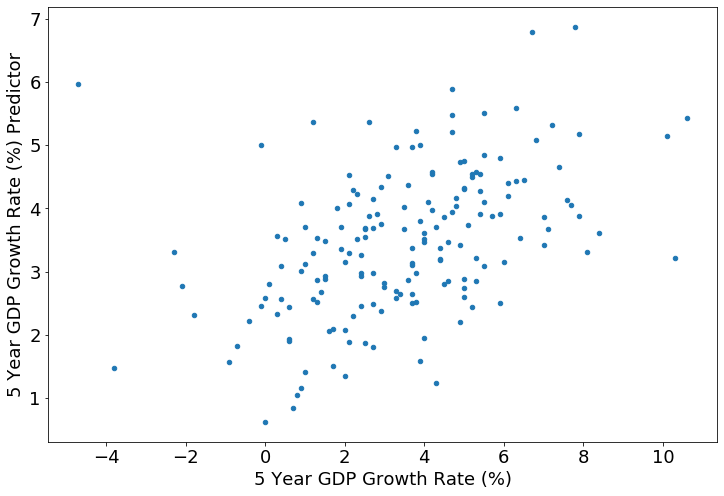

In [19]:
import matplotlib.pyplot as plt

predictor = results.predict()
data[y_var[0] + " Predictor"] = predictor
fig, ax = plt.subplots(figsize = (12, 8))
plt.rcParams.update({"font.size": 18})
data.plot.scatter(x = y_var[0], 
                  y = y_var[0] + " Predictor", ax = ax)